In [1]:
from audiomentations import *
import pandas as pd
import scipy.io
import scipy.signal as ss
# import pywt
import glob
import matplotlib.pyplot as plt
import scaleogram as scg
from scaleogram import cws
import numpy as np
from math import *
import os
import cv2
from scipy.io import loadmat
import random

In [2]:
print(os.getcwd())

/home/linhpika/git/HeartResearch/Data Preprocessing


In [3]:
os.chdir("..")

In [4]:
main_data_dir = os.getcwd() + "/Data set"

In [7]:
label_path = main_data_dir + "/Label.csv"
label_df = pd.read_csv(label_path)
label_df.drop(['Second_label', 'Third_label'], axis=1)

,Recording,First_label
0,A0001,5
1,A0002,1
2,A0003,2
3,A0004,2
4,A0005,7
...,...,...
6872,A6873,3
6873,A6874,8
6874,A6875,4
6875,A6876,2


In [11]:
print(label_df[label_df["Recording"] == "A0001"]["First_label"].values.tolist()[0])

5


In [ ]:
data_dir = "/media/mountHDD1/ecg/"
data_mat_files = glob.glob(main_data_dir + "/TrainingSet*/*")

In [ ]:
def data_extract(signal_raw_list, start_point):
    signal_list = []
    signal_number_list = []
    
    for signal in signal_raw_list:
        mat = scipy.io.loadmat(signal)
        signal_list.append(mat['ECG'][0][0][2][:,start_point:])
        signal_number = signal.split('//')[-1].split('.')[0]
        signal_number_list.append(signal_number)

    return (signal_list, signal_number_list)

signal_list, signal_number = data_extract(data_mat_files, 300)

In [22]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.2),
    AddGaussianSNR(min_snr_db=15.0, max_snr_db=40.0, p=0.2),
    Gain(min_gain_db = -15.0, max_gain_db = 15.0, p =0.2),
    GainTransition(min_gain_db = -15.0, max_gain_db = 15.0, 
                   min_duration = 50, max_duration = 200, duration_unit = "samples", 
                   p = 0.2),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.2),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.2),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.2),
])

In [16]:
files_path = main_data_dir + "/A0001.mat"
mat = scipy.io.loadmat(files_path)['ECG'][0][0][2][:,300:]
mat

array([[ 0.0122288 ,  0.0142288 ,  0.0152288 , ...,  0.2582288 ,
         0.2592288 ,  0.2592288 ],
       [ 0.07172947,  0.07572947,  0.07972947, ...,  0.24772947,
         0.24872947,  0.24972947],
       [ 0.05950067,  0.06150067,  0.06450067, ..., -0.01049933,
        -0.01049933, -0.00949933],
       ...,
       [ 0.17999347,  0.18799347,  0.19499347, ...,  0.19399347,
         0.19399347,  0.19499347],
       [ 0.2050428 ,  0.2150428 ,  0.2240428 , ...,  0.3070428 ,
         0.3070428 ,  0.3070428 ],
       [ 0.36841493,  0.38041493,  0.39241493, ...,  0.21341493,
         0.21441493,  0.21441493]])

/tmp/ipykernel_15390/3245366305.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (30, 12))


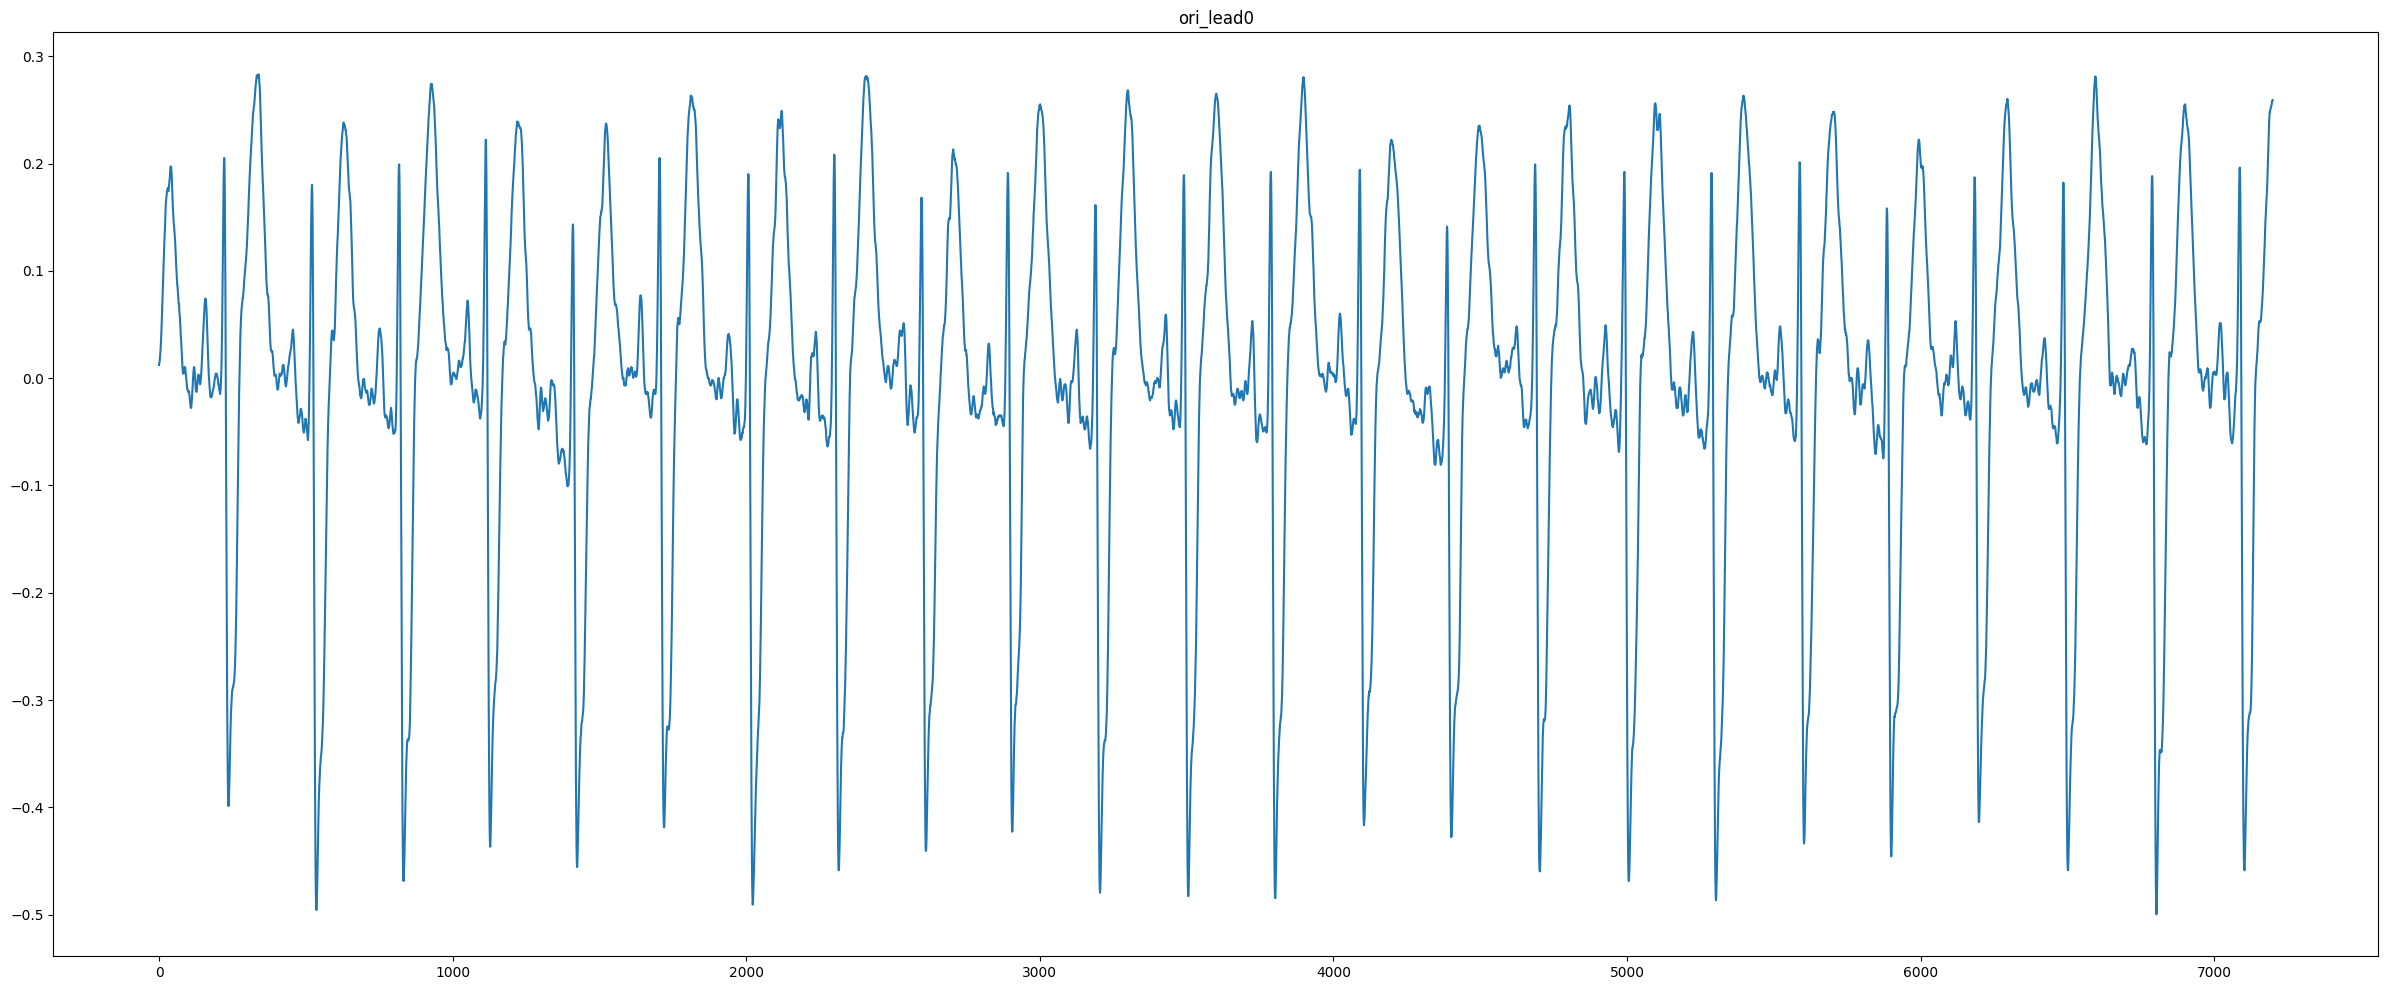

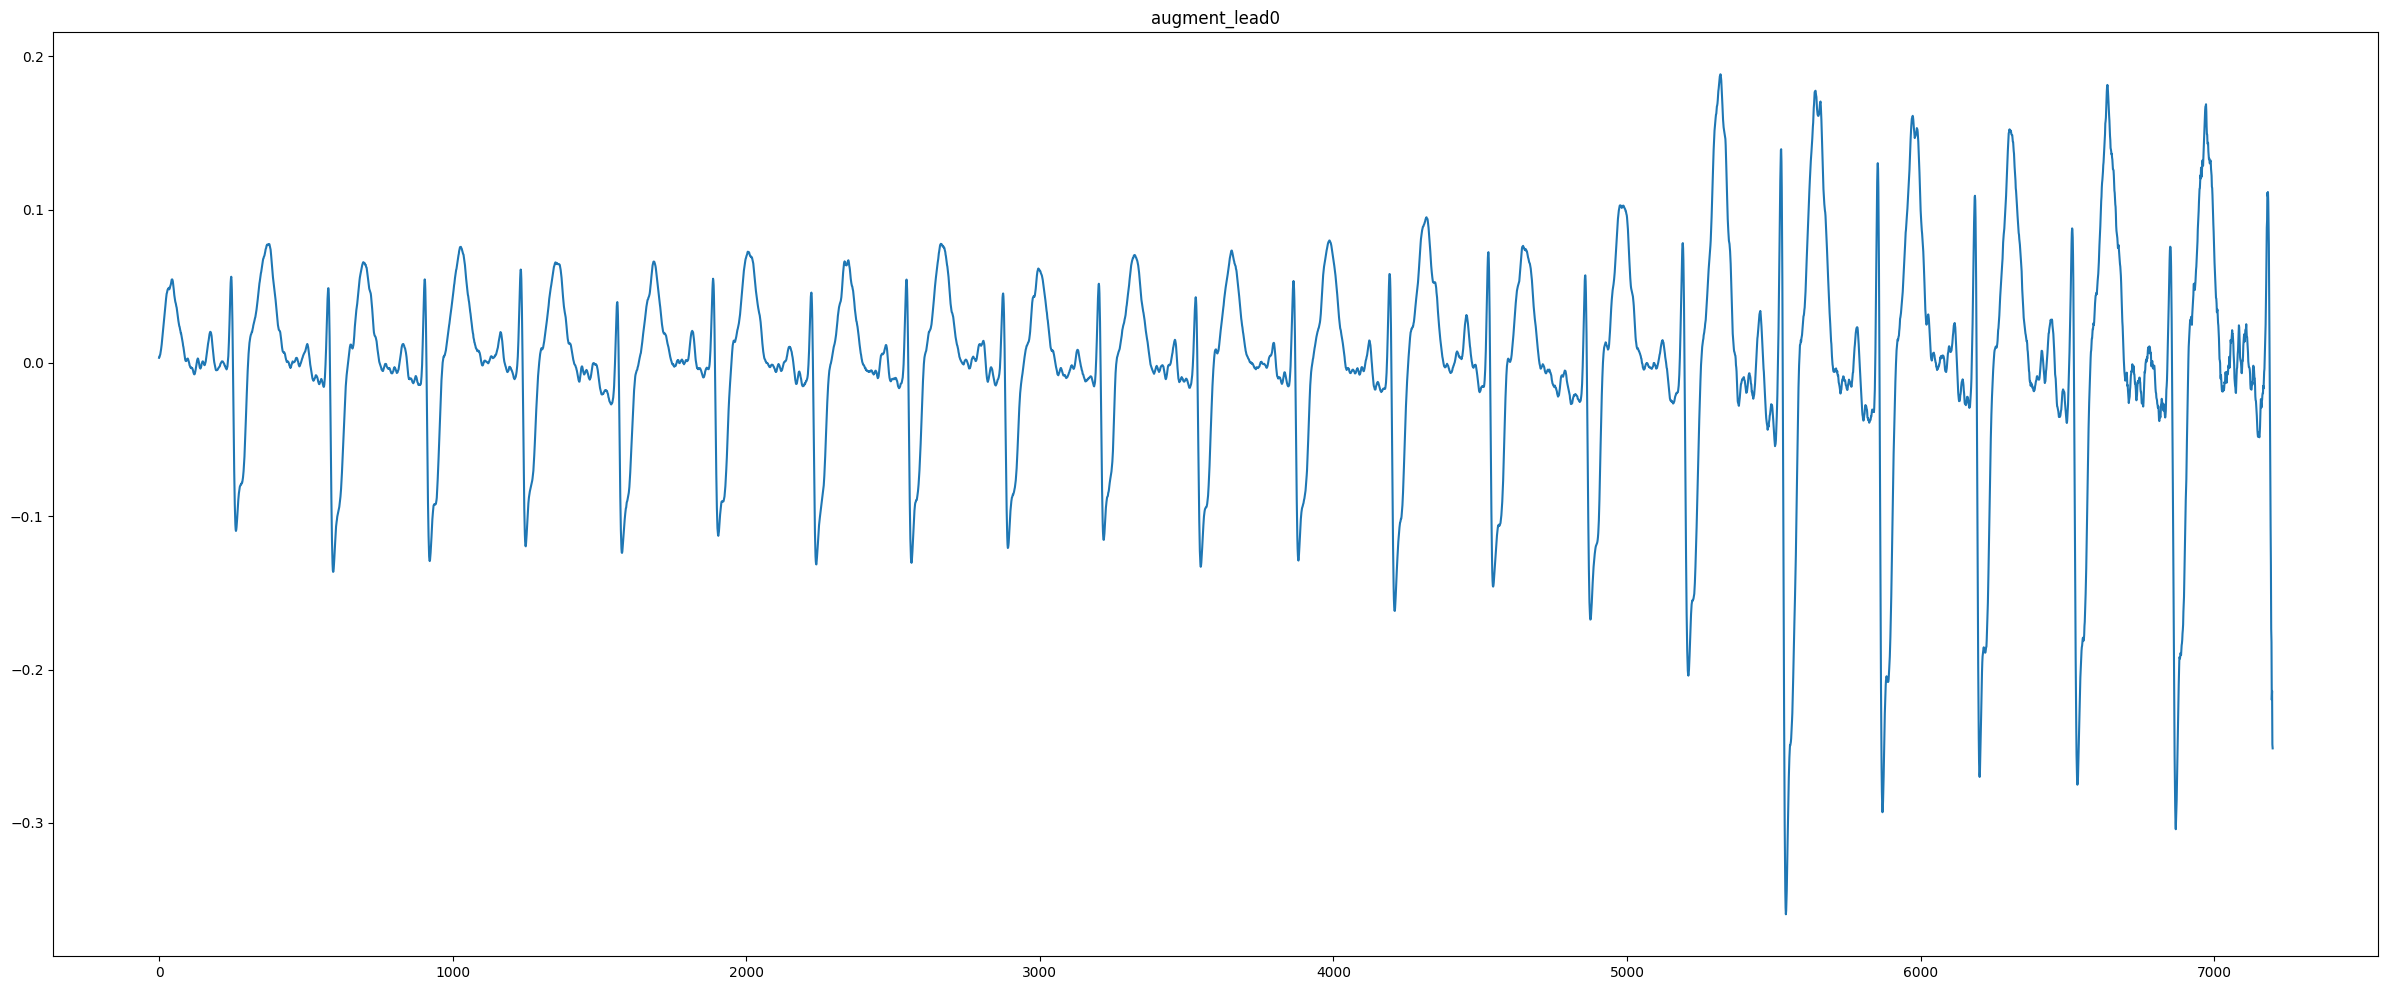

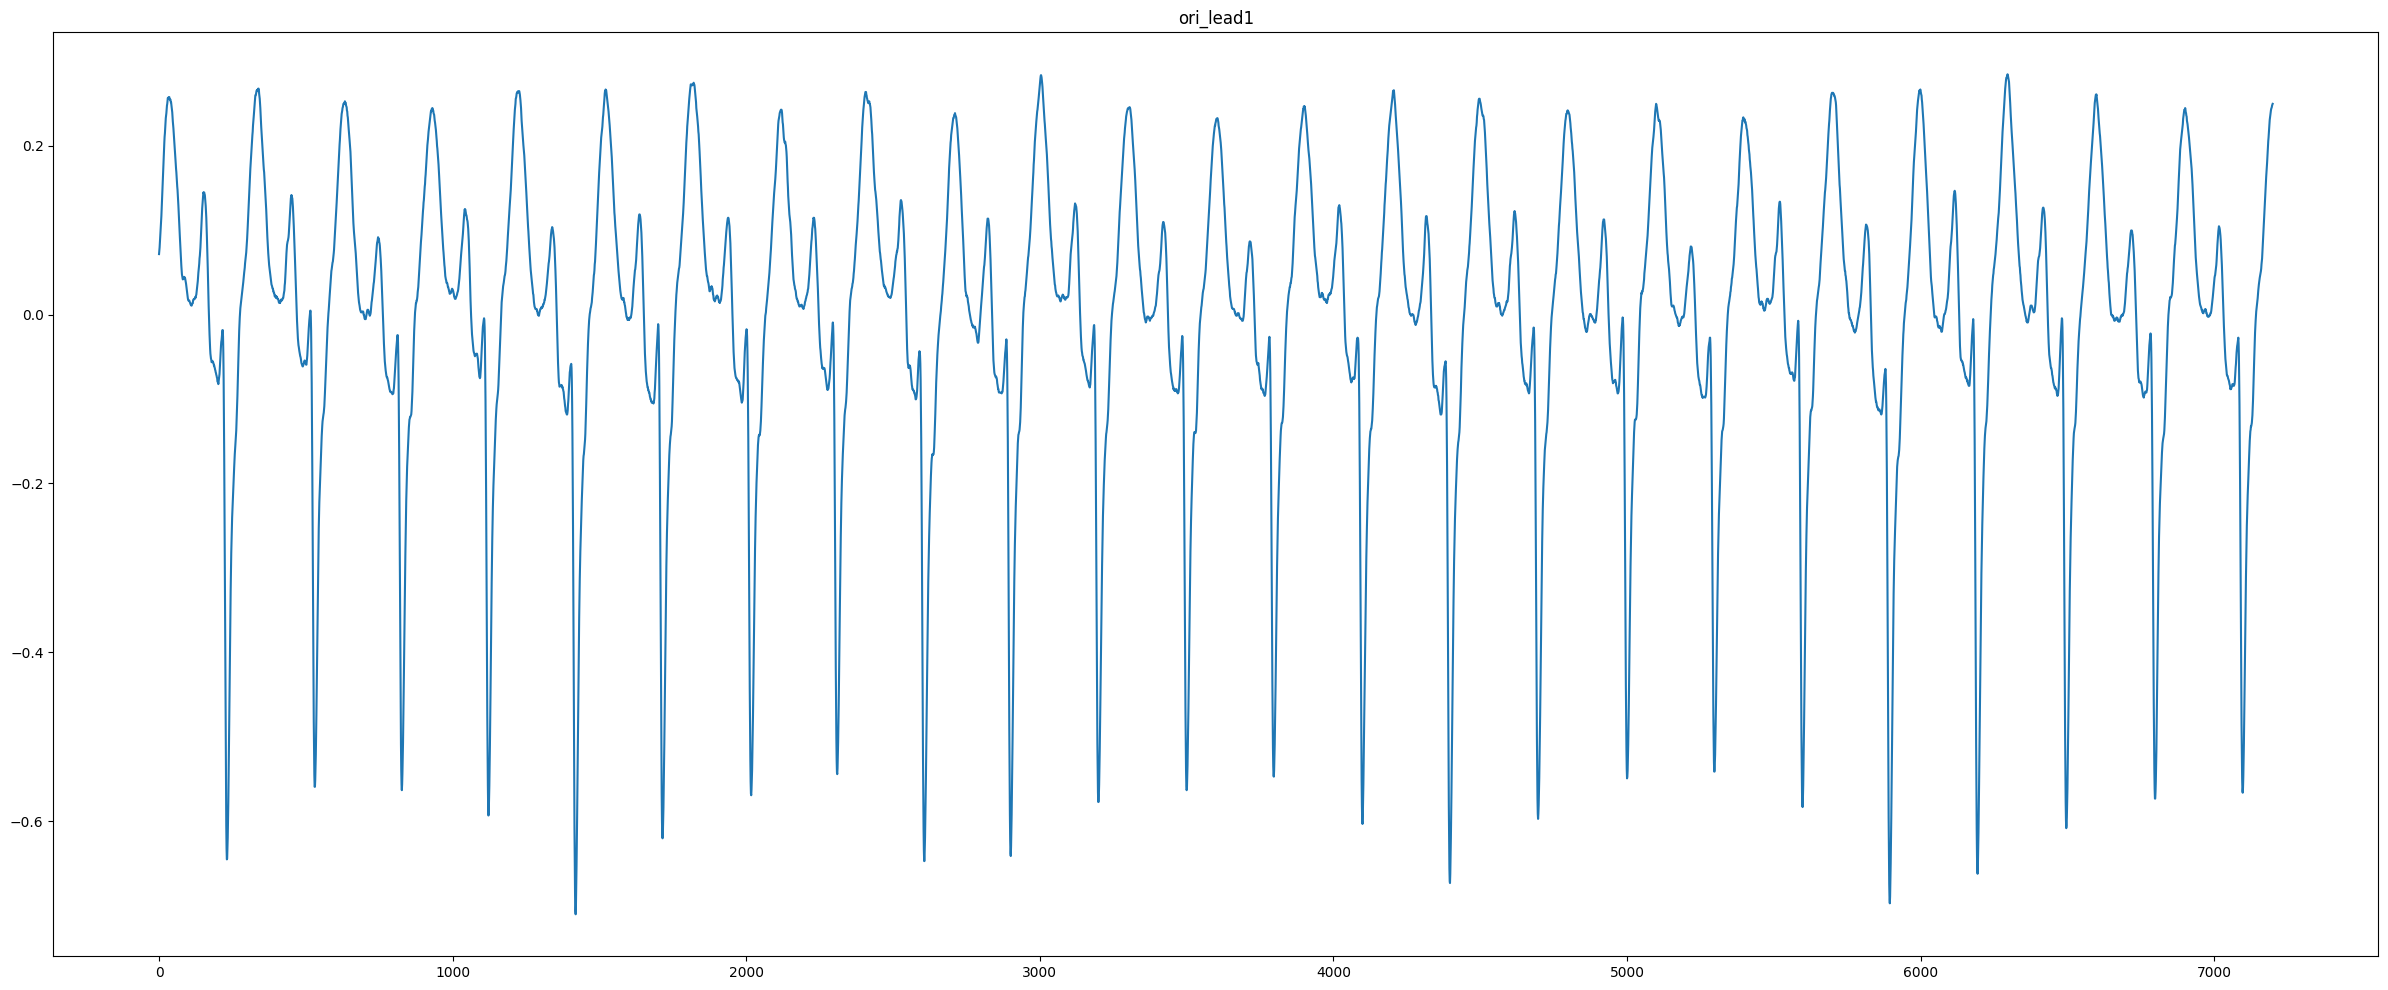

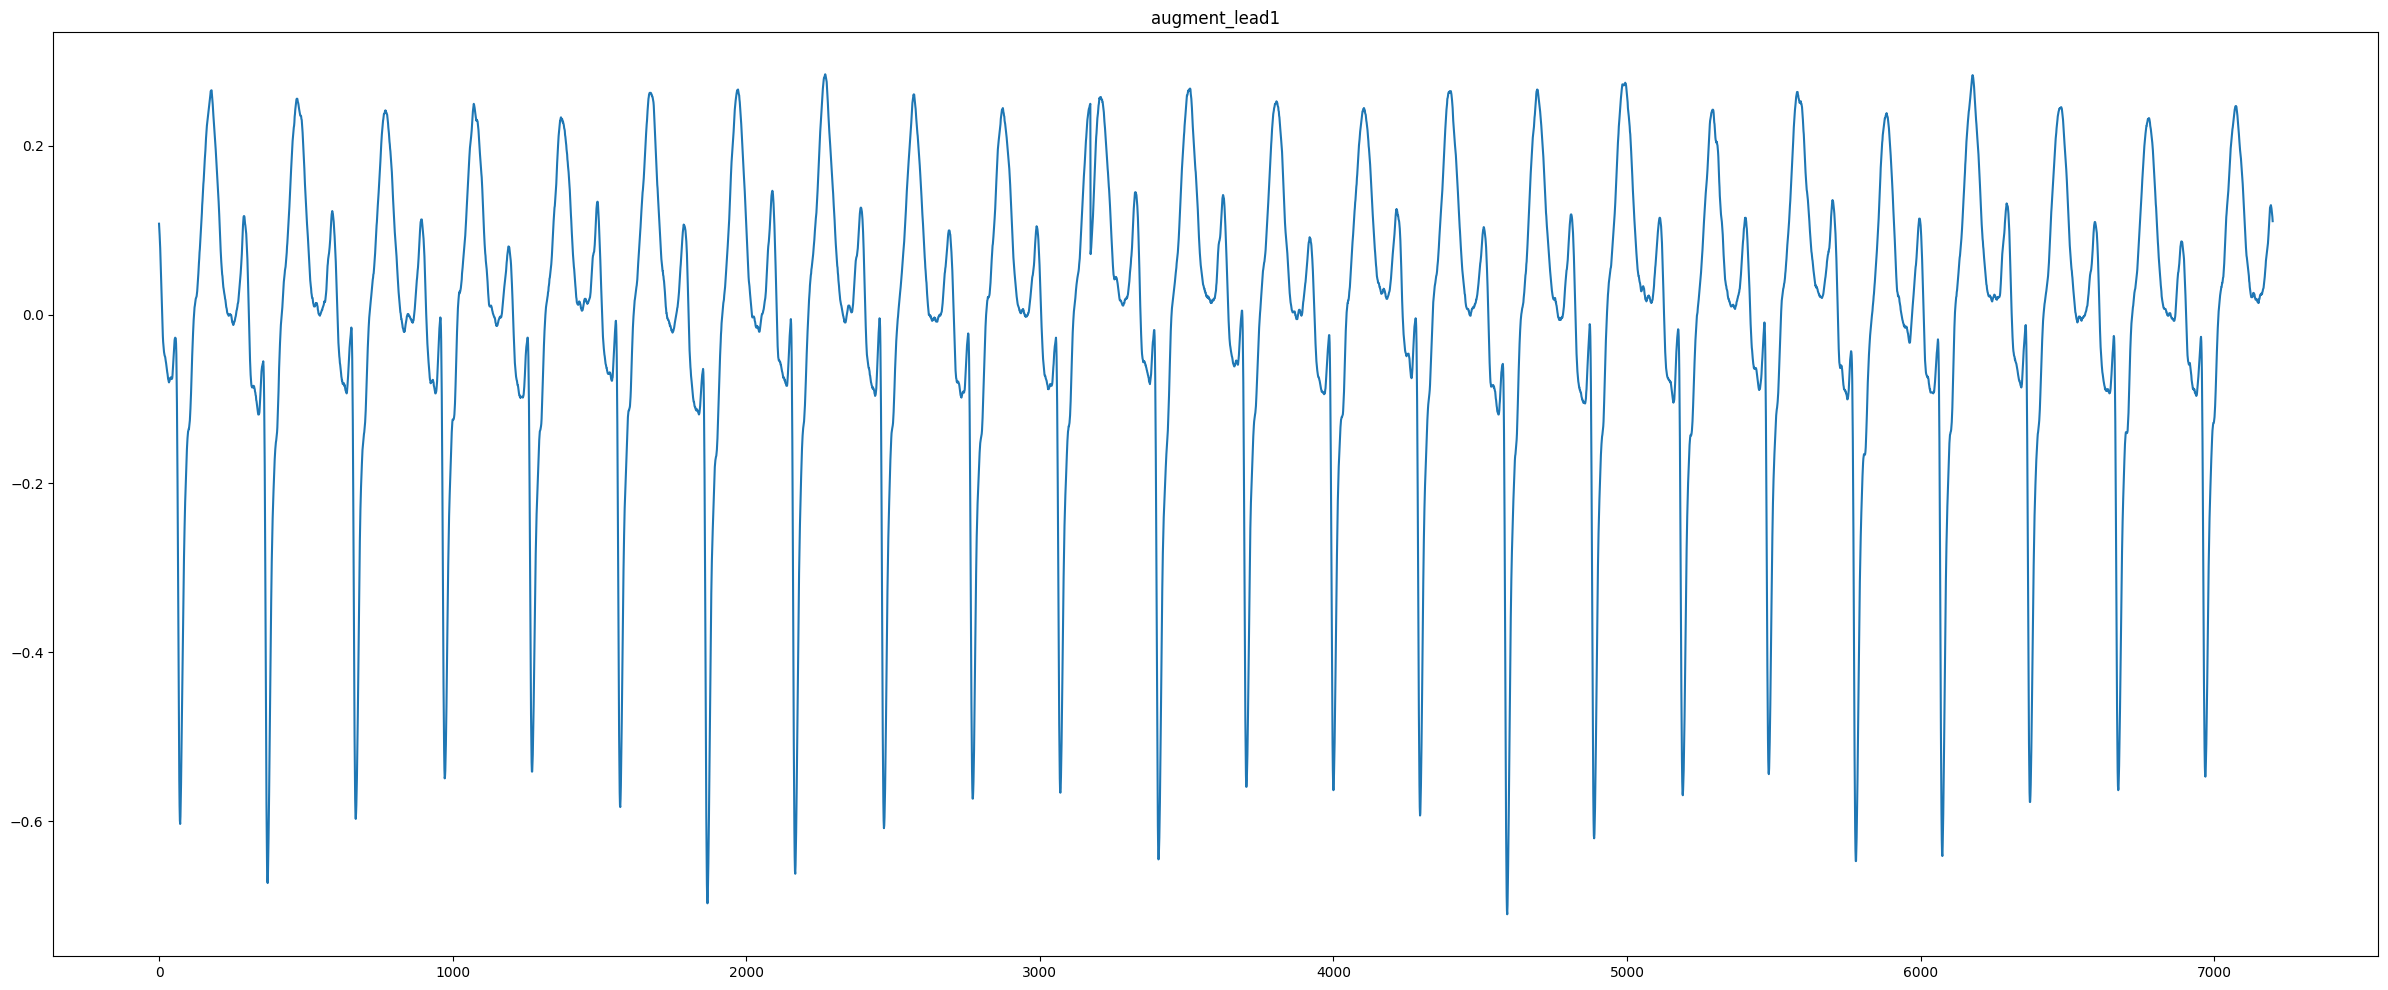

In [ ]:
signal_list = [mat]
count = 0
lead = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']

save_aug_dir = main_data_dir + "/Augmentation"
if not os.path.exists(save_aug_dir):
    os.mkdir(save_aug_dir)
save_aug_path = save_aug_dir + "/Augment_{}_lead{}_class{}.mat"


for i in range(len(signal_list)):
    for j in range(12):
        samples = signal_list[i][j]
        augmented_samples = augment(samples=samples, sample_rate=500)
        sample_name = "A0001"
#         sample_name = signal_number[floor(i/12)]
        sample_lead = lead[j]
        sample_class = label_df[label_df["Recording"] == sample_name]["First_label"].values.tolist()[0]
#         scipy.io.savemat(save_aug_path.format(signal_name, sample_lead, sample_class), 
#                          mdic = {"Sample name": sample_name, "Lead": sample_lead, "Class": sample_class}
#                         )
        plt.figure(figsize = (30, 12))
#         plt.subplot(12, 2, j+1)
        plt.plot(mat[j])
        plt.title(f"ori_lead{j}")
#         plt.plot(mat[j])
#         plt.subplot(12, 2, j+2)
        plt.figure(figsize = (30, 12))        
        plt.plot(augmented_samples)
        plt.title(f"augment_lead{j}")
        